In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [43]:
train_data_file='./data/zhengqi_train.txt'
test_data_file='./data/zhengqi_test.txt'
train_data = pd.read_csv(train_data_file,sep = '\t')
test_data = pd.read_csv(test_data_file,sep = '\t')

train_data 2888个样本，特征V0到V37，全是float格式，没有空值。有target
test_data 1925个样本，特征V0到V37，全是float格式，没有空值。没有target

In [4]:
train_data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,-0.067790,0.012921,-0.558565,0.182892,0.116155,0.177856,-0.169452,...,0.097648,0.055477,0.127791,0.020806,0.007801,0.006715,0.197764,0.030658,-0.130330,0.126353
std,0.928031,0.941515,0.911236,0.970298,0.888377,0.517957,0.918054,0.955116,0.895444,0.953813,...,1.061200,0.901934,0.873028,0.902584,1.006995,1.003291,0.985675,0.970812,1.017196,0.983966
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-12.891000,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226250,-0.313000,-0.652250,-0.385000,-0.853000,-0.310000,-0.295000,-0.159000,-0.390000,...,-0.664000,-0.283000,-0.170250,-0.407250,-0.499000,-0.290000,-0.202500,-0.413000,-0.798250,-0.350250
50%,0.359000,0.272500,0.386000,-0.044500,0.110000,-0.466000,0.388000,0.344000,0.362000,0.042000,...,-0.023000,0.053500,0.299500,0.039000,-0.040000,0.160000,0.364000,0.137000,-0.185500,0.313000
75%,0.726000,0.599000,0.918250,0.624000,0.550250,-0.154000,0.831250,0.782250,0.726000,0.042000,...,0.745250,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.644250,0.495250,0.793250
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.335000,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


In [5]:
test_data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,...,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,-0.184404,-0.083912,-0.434762,0.101671,-0.019172,0.838049,-0.274092,-0.173971,-0.266709,0.255114,...,-0.206871,-0.146463,-0.083215,-0.191729,-0.030782,-0.011433,-0.009985,-0.296895,-0.046270,0.195735
std,1.073333,1.076670,0.969541,1.034925,1.147286,0.963043,1.054119,1.040101,1.085916,1.014394,...,1.064140,0.880593,1.126414,1.138454,1.130228,0.989732,0.995213,0.946896,1.040854,0.940599
min,-4.814000,-5.488000,-4.283000,-3.276000,-4.921000,-1.168000,-5.649000,-5.625000,-6.059000,-6.784000,...,-2.435000,-2.413000,-4.507000,-7.698000,-4.057000,-4.627000,-4.789000,-7.477000,-2.608000,-3.346000
25%,-0.664000,-0.451000,-0.978000,-0.644000,-0.497000,0.122000,-0.732000,-0.509000,-0.775000,-0.390000,...,-0.453000,-0.818000,-0.339000,-0.476000,-0.472000,-0.460000,-0.290000,-0.349000,-0.593000,-0.432000
50%,0.065000,0.195000,-0.267000,0.220000,0.118000,0.437000,-0.082000,0.018000,-0.004000,0.401000,...,-0.445000,-0.199000,0.010000,0.100000,0.155000,-0.040000,0.160000,-0.270000,0.083000,0.152000
75%,0.549000,0.589000,0.278000,0.793000,0.610000,1.928000,0.457000,0.515000,0.482000,0.904000,...,-0.434000,0.468000,0.447000,0.471000,0.627000,0.419000,0.273000,0.364000,0.651000,0.797000
max,2.100000,2.120000,1.946000,2.603000,4.475000,3.176000,1.528000,1.394000,2.408000,1.766000,...,4.656000,3.022000,3.139000,1.428000,2.299000,5.465000,5.110000,1.671000,2.861000,3.021000


# 数据处理
## 训练集和验证集分布-kde

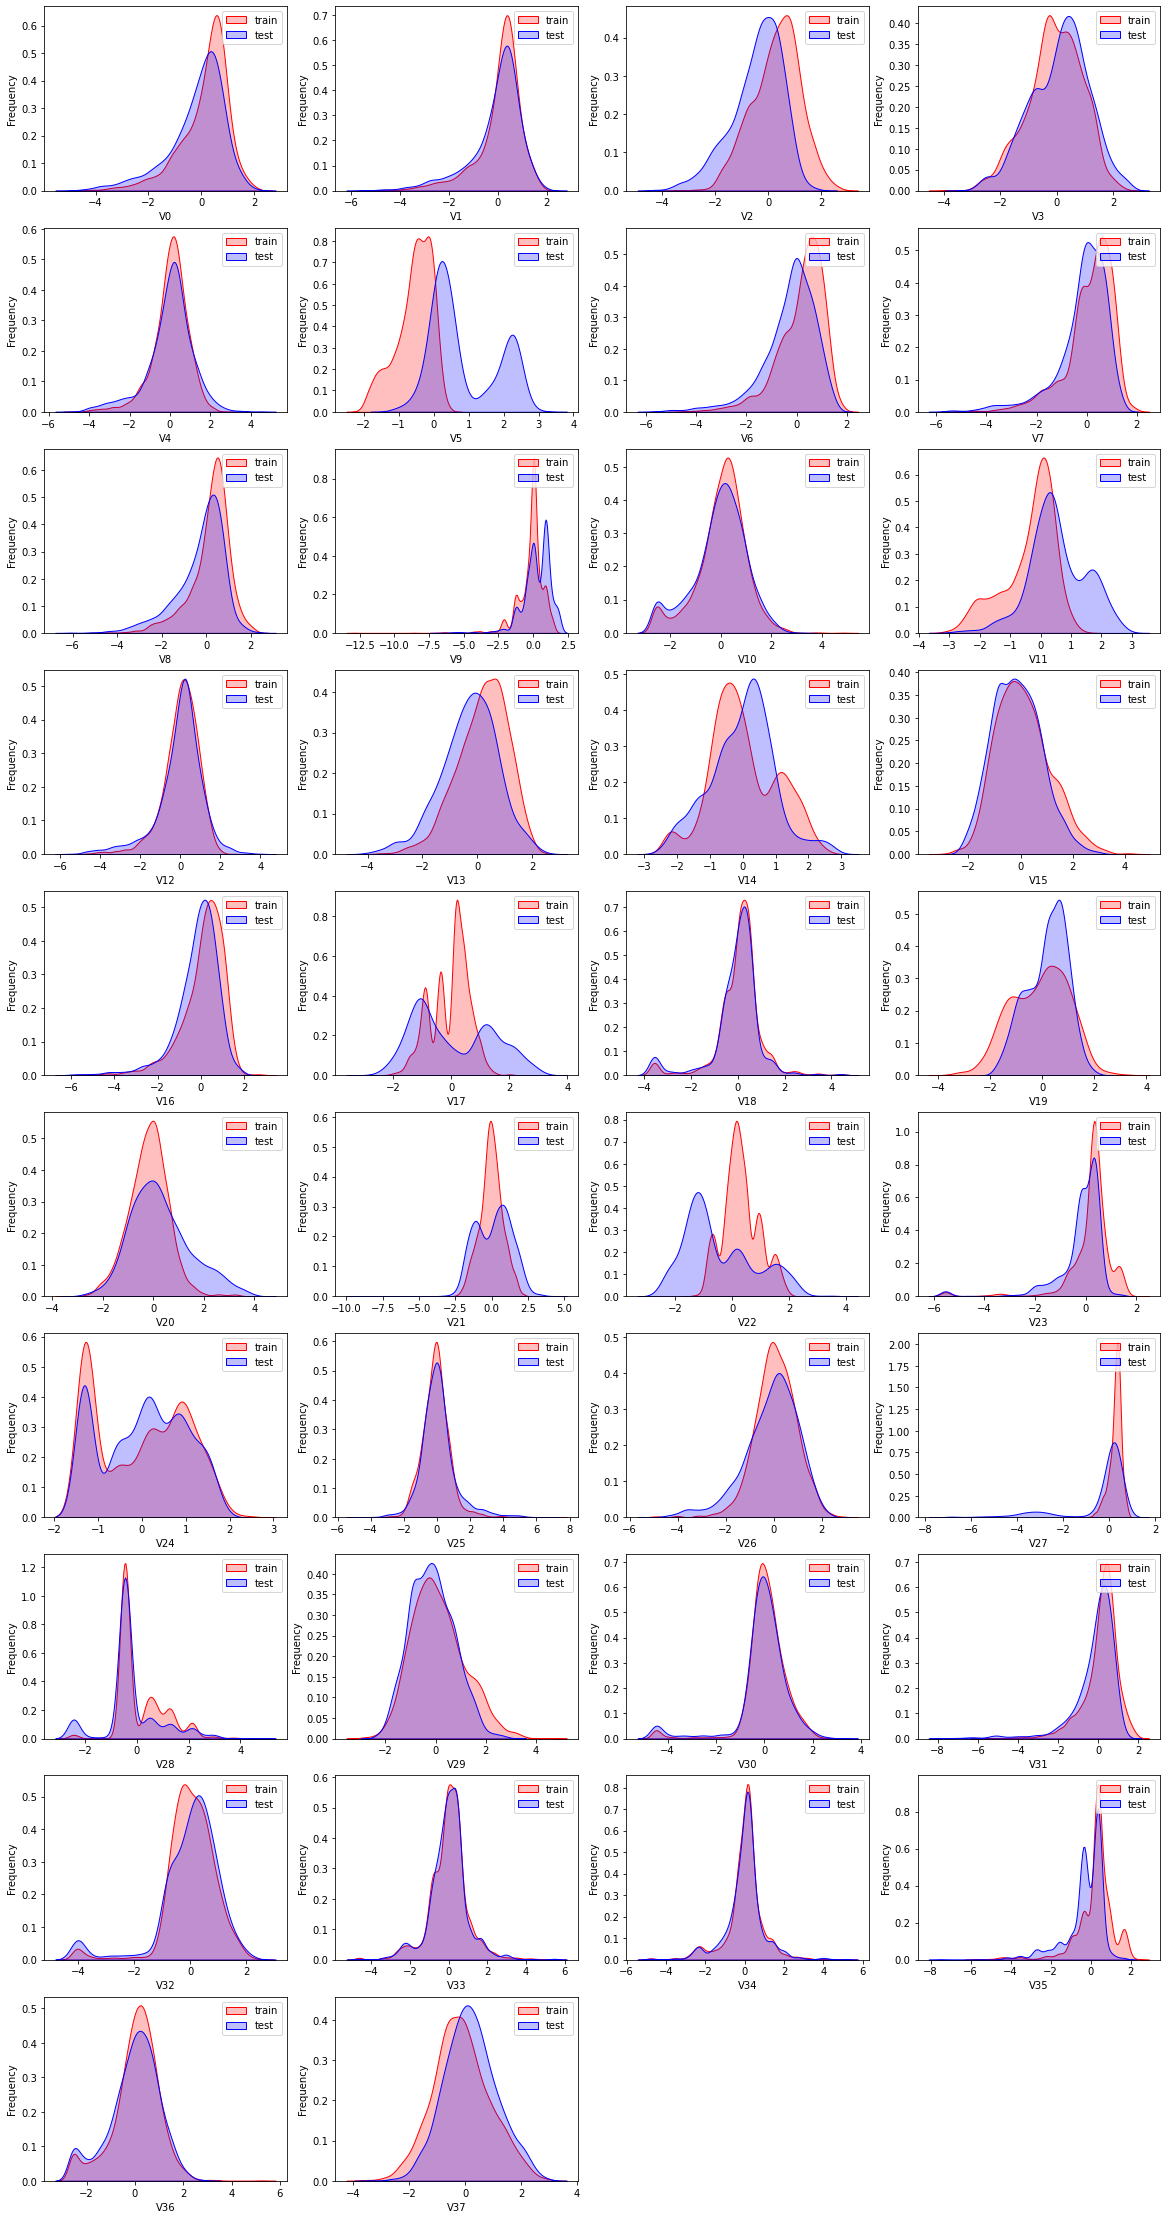

In [11]:
plt.figure(figsize=(20,40))
i=1
for col in test_data.columns:
    ax=plt.subplot(10,4,i)
    ax=sns.kdeplot(train_data[col],color='Red',shade=True)
    ax=sns.kdeplot(test_data[col],color='Blue',shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax=ax.legend(['train','test'])
    i+=1

In [3]:
# V5 V17 V22
train_data=train_data.drop(['V5','V17','V22'],axis=1)
test_data=test_data.drop(['V5','V17','V22'],axis=1)

## 特征和标签相关度

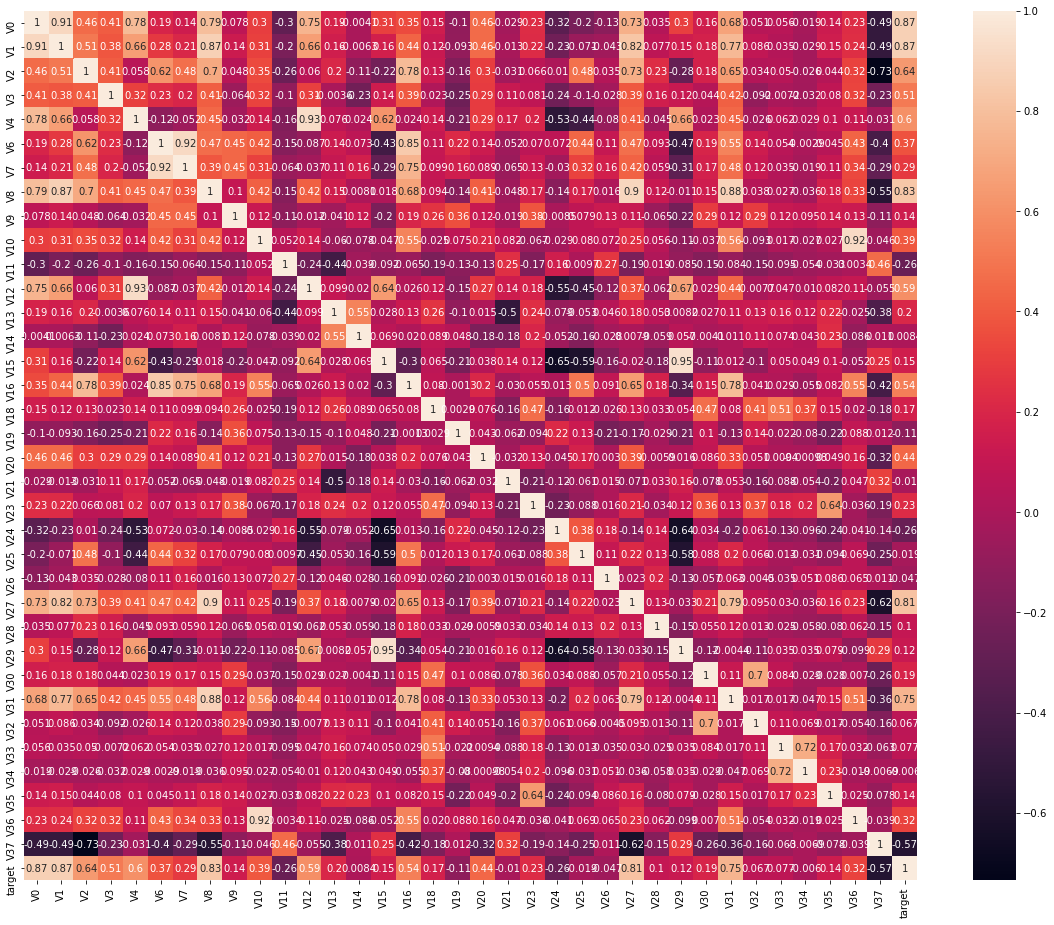

In [6]:
train_corr=train_data.corr()
ax=plt.subplots(figsize=(20,16))
ax=sns.heatmap(train_corr,annot=True)

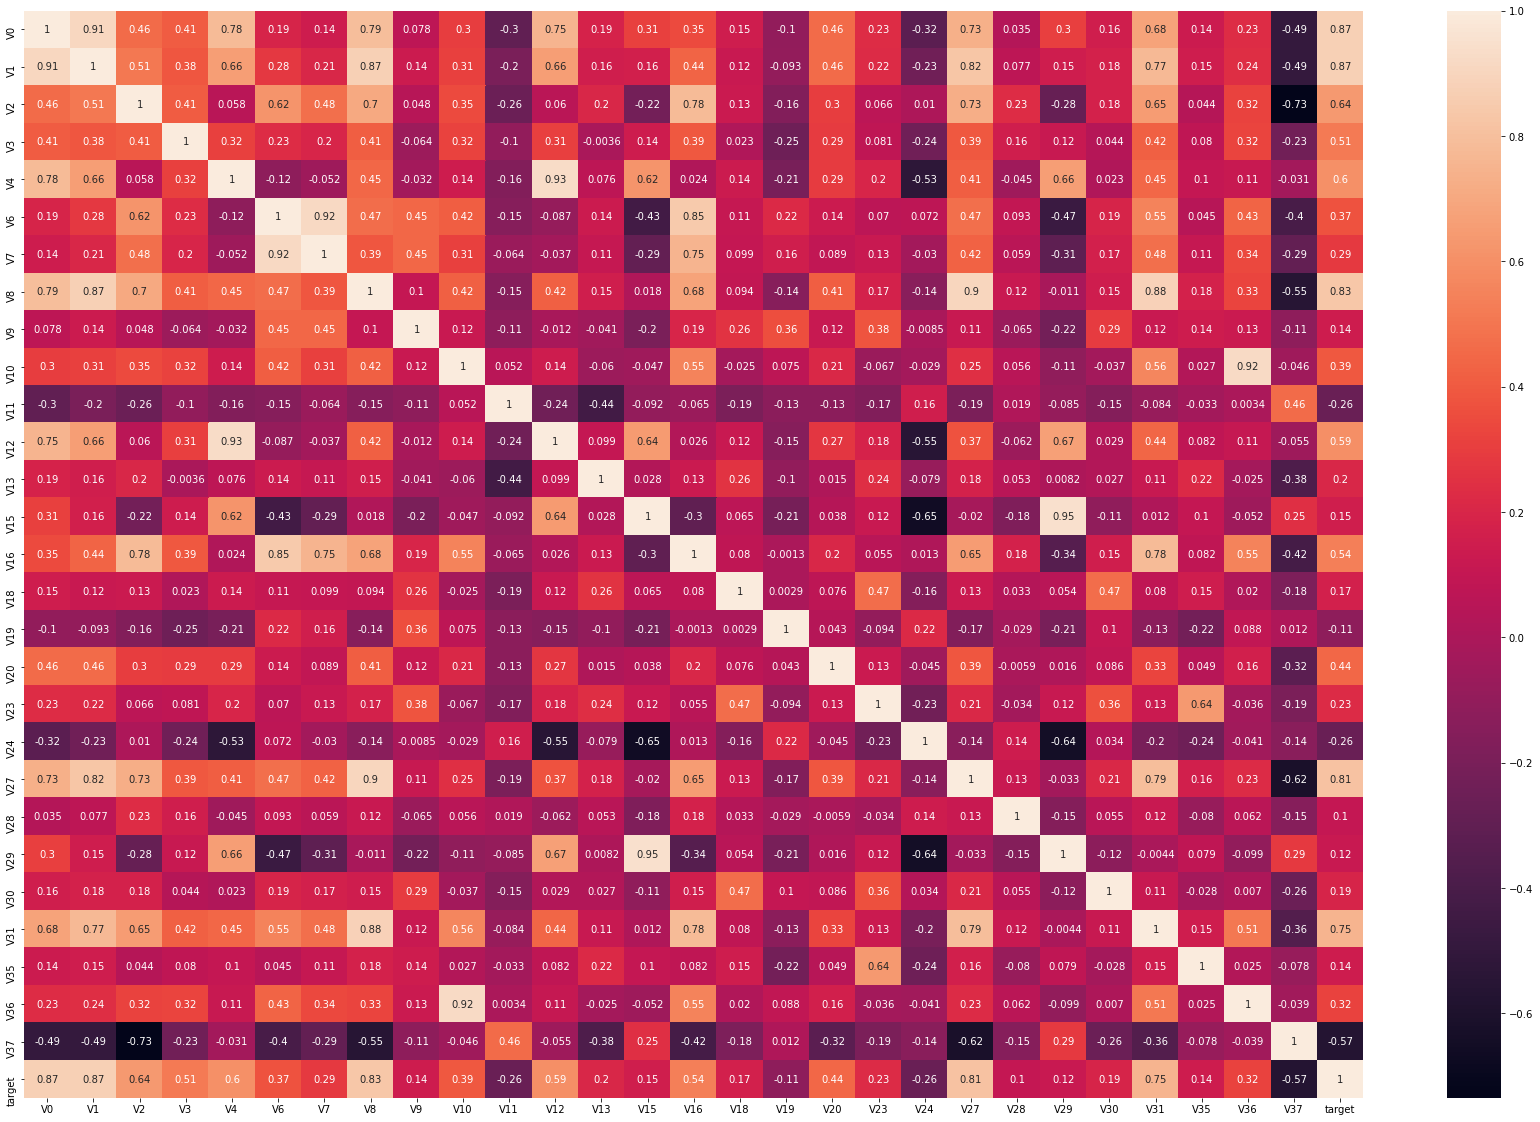

In [7]:
# 筛选相关洗漱大于0.1的变量
threshold=0.1

corrmat=train_data.corr()
top_corr_features=corrmat.index[abs(corrmat['target'])>threshold]
g=plt.subplots(figsize=(30,20))
g=sns.heatmap(train_data[top_corr_features].corr(),annot=True)

In [8]:
train_data=train_data[top_corr_features]# 删除低相关度特征
test_data=test_data[top_corr_features[:-1]]

In [32]:
test_data

,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,...,V23,V24,V27,V28,V29,V30,V31,V35,V36,V37
0,0.368,0.380,-0.225,-0.049,0.379,0.550,0.551,0.244,0.904,-0.419,...,0.098,-1.314,0.208,-0.449,0.047,0.057,-0.042,-0.190,-0.567,0.388
1,0.148,0.489,-0.247,-0.049,0.122,0.487,0.493,-0.127,0.904,-0.403,...,0.090,-1.310,0.226,-0.443,0.047,0.560,0.176,0.008,-0.294,0.104
2,-0.166,-0.062,-0.311,0.046,-0.055,0.485,0.493,-0.227,0.904,0.330,...,0.091,-1.310,0.084,-0.458,-0.398,0.101,0.199,0.008,0.373,0.569
3,0.102,0.294,-0.259,0.051,-0.183,0.474,0.504,0.010,0.904,-0.431,...,0.086,0.234,0.203,-0.456,-0.398,1.007,0.137,0.008,-0.666,0.391
4,0.300,0.428,0.208,0.051,-0.033,0.408,0.497,0.155,0.904,-0.162,...,0.089,0.237,0.227,-0.458,-0.776,0.291,0.370,0.008,-0.140,-0.497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,-1.362,-1.553,-3.096,-0.444,0.381,-4.854,-5.331,-4.074,-3.838,-2.551,...,-1.538,-0.630,-1.674,0.525,0.171,-4.488,-5.793,-2.131,-2.564,0.597
1921,-2.698,-3.452,-3.620,-1.066,-1.385,-4.927,-5.103,-4.393,-1.683,-2.525,...,-1.479,-0.204,-1.773,-0.446,1.297,-0.613,-7.698,-2.131,-2.564,1.215
1922,-2.615,-3.564,-3.402,-0.422,-1.272,-4.223,-4.315,-5.196,-3.407,-2.529,...,-1.085,1.057,-1.585,-0.447,0.552,0.125,-6.111,-1.537,-2.544,1.612
1923,-2.661,-3.646,-3.271,-0.699,-1.270,-3.716,-3.809,-4.735,-2.976,-2.560,...,-1.084,0.800,-1.410,-0.447,0.318,1.086,-5.268,-1.537,-2.549,1.431


# 特征工程
## 构造自定义特征

In [44]:
epsilon=1e-5
func_dict={
    'add':lambda x,y:x+y,
    'mins':lambda x,y:x-y,
    'div':lambda x,y:x/(y+epsilon),
    'mul':lambda x,y:x*y
}
def auto_feature_make(train_data,test_data,func_dict,col_list):
    train_data,test_data=train_data.copy(),test_data.copy()
    col_len=len(col_list)
    for i in range(col_len):
        for j in range(i+1,col_len):
            for fun_name,func in func_dict.items():
                for data in [train_data,test_data]:
                    func_features=func(data[col_list[i]],data[col_list[j]])
                    col_func_features='-'.join([col_list[i],fun_name,col_list[j]])
                    data[col_func_features]=func_features
    return train_data,test_data

In [45]:
train_data1,test_data1=auto_feature_make(train_data,test_data,func_dict,test_data.columns)# 变成了1541个特征

## PCA降维

In [34]:
from sklearn.decomposition import PCA
pca=PCA(n_components=500)
train_data1_pca=pca.fit_transform(train_data1.iloc[:,:-1])
test_data1_pca=pca.transform(test_data1)
train_data1_pca=pd.DataFrame(train_data1_pca)
test_data1_pca=pd.DataFrame(test_data1_pca)
train_data1_pca['target']=train_data1['target']

In [35]:
X_train=train_data1_pca.drop(['target'],axis=1).values
y_train=train_data1_pca['target']

In [47]:
X_train=train_data1.drop(['target'],axis=1).values
y_train=train_data1_pca['target']

In [37]:
train_data1.shape

(2888, 1541)

In [60]:
train_data1[test_data1.columns].values

array([[ 0.566     ,  0.016     , -0.143     , ...,  0.9       ,
         0.74344568,  9.148864  ],
       [ 0.968     ,  0.437     ,  0.066     , ...,  0.395     ,
         0.4589104 ,  0.24455   ],
       [ 1.013     ,  0.568     ,  0.235     , ...,  1.354     ,
        -1.2988336 , -0.450585  ],
       ...,
       [-0.394     , -0.721     , -0.485     , ...,  0.203     ,
         1.27137338,  0.711348  ],
       [-0.219     , -0.282     , -0.344     , ..., -0.856     ,
        -0.54233257, -0.167055  ],
       [ 0.368     ,  0.38      , -0.225     , ..., -0.955     ,
        -1.46130254, -0.219996  ]])

In [61]:
train_data1['target']

0       0.175
1       0.676
2       0.633
3       0.206
4       0.384
        ...  
2883    0.235
2884    1.042
2885    0.005
2886    0.350
2887    0.417
Name: target, Length: 2888, dtype: float64

In [48]:
from lightgbm import LGBMRegressor 
from sklearn.model_selection import KFold


# 原始数据集 X_train,y_train
folds=5
kf=KFold(n_splits=folds,shuffle=True,random_state=2019)
for i, (train_index,test_index) in enumerate(kf.split(X_train)):
    lgbr=LGBMRegressor()
    lgbr.fit(X_train[train_index],y_train[train_index])
    y_pred_lgbr=lgbr.predict(X_train[test_index])
    print(i,'th fold：',mean_squared_error(y_pred_lgbr,y_train[test_index]))

0 th fold： 0.10432163507609538
1 th fold： 0.12733628622934312
2 th fold： 0.09841509400819799
3 th fold： 0.10258696217671565
4 th fold： 0.10491988599247778


In [40]:
result=lgbr.predict(test_data1)

In [42]:
pd.DataFrame(result).to_csv('result_20220427.txt',index=False,header=False)